In [ ]:
!pip install face_recognition

  Using cached face_recognition-1.3.0-py2.py3-none-any.whl (15 kB)
  Using cached face_recognition_models-0.3.0.tar.gz (100.1 MB)
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566185 sha256=25a9201250920ddb4ea4544a10ef7d876cb86c083b547145daad31ea1536cee1
  Stored in directory: /root/.cache/pip/wheels/d6/81/3c/884bcd5e1c120ff548d57c2ecc9ebf3281c9a6f7c0e7e7947a
Successfully built face-recognition-models


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [97]:
data_path = '/content/drive/MyDrive/Colab Notebooks/data/faces_recog'

In [ ]:
GOPR4771.jpg

In [ ]:
!mkdir faces_recognition_with_square

In [ ]:
!mkdir test_data

In [99]:
def read_img(path):
    img = cv2.imread(path)
    (h, w) = img.shape[:2]
    width = 500
    ratio = width / float(w)
    height = int(h * ratio)
    return cv2.resize(img, (width, height))


In [ ]:
face_recognition.face_locations(y_img1)

In [ ]:
cv2.rectangle(y_img1, (left, top), (right, bottom), (0, 0, 255), )

In [ ]:
img_list = []
for file in os.listdir(data_path):
    y_img1 = read_img("/content/drive/MyDrive/Colab Notebooks/data/faces_recog/"+file)
    img_enc = face_recognition.face_encodings(y_img1,num_jitters=100)
    #print(len(img_enc))
    for i in range(len(img_enc)):
        (top, right, bottom, left) = face_recognition.face_locations(y_img1)[0]
        cv2.rectangle(y_img1, (left, top), (right, bottom), (0, 0, 255), 2)
        #cv2.putText(y_img1, 'name', (left+2, bottom+20), cv2.FONT_HERSHEY_PLAIN, 1, (255, 255, 255), 1)
    img_list.append(y_img1)

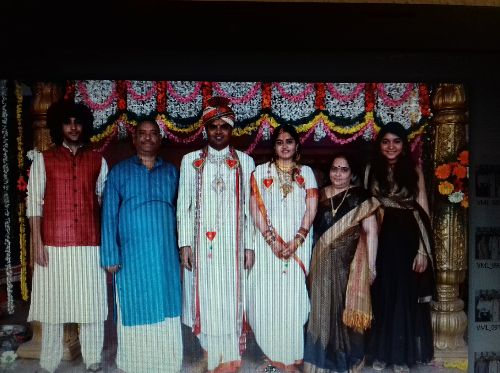

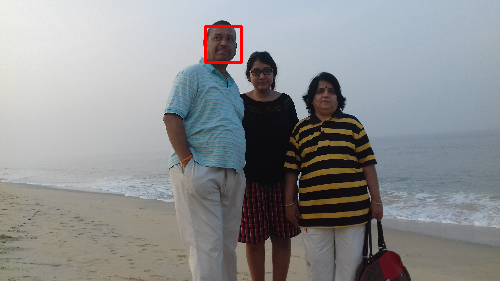

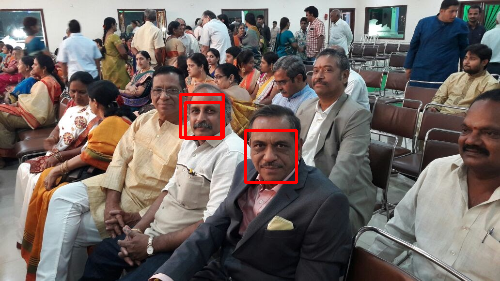

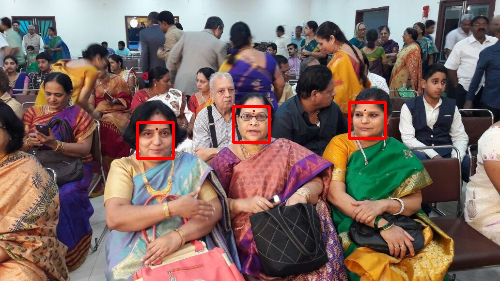

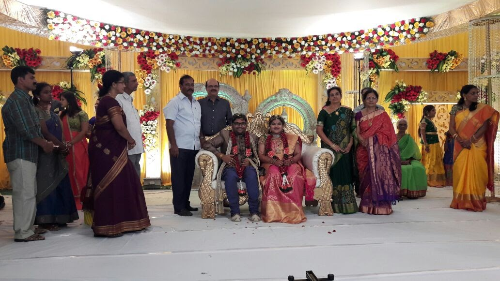

In [ ]:
count = 0
for img in img_list:
  cv2_imshow(img)
  count += 1
  if count ==5:
    break

In [ ]:
type(y_img1)

numpy.ndarray

In [ ]:
img_enc

In [ ]:
import face_recognition
import cv2
import os
from google.colab.patches import cv2_imshow

def read_img(path):
    img = cv2.imread(path)
    (h, w) = img.shape[:2]
    width = 500
    ratio = width / float(w)
    height = int(h * ratio)
    return cv2.resize(img, (width, height))


known_encodings = []
known_names = []
known_dir = data_path

for file in os.listdir(known_dir):
    img = read_img(known_dir+'/'+file)
    img_enc = face_recognition.face_encodings(img,num_jitters=30)
    known_encodings.append(img_enc)
    known_names.append(file.split('.')[0])

#unknown_dir = 'unknown'
#for file in os.listdir(unknown_dir):
 #   print("Processing", file)
  #  img = read_img(unknown_dir + '/' + file)
   # img_enc = face_recognition.face_encodings(img)[0]

    #results = face_recognition.compare_faces(known_encodings, img_enc)
    # print(face_recognition.face_distance(known_encodings, img_enc))

    #for i in range(len(results)):
     #   if results[i]:
      #      name = known_names[i]
       #     (top, right, bottom, left) = face_recognition.face_locations(img)[0]
        #    cv2.rectangle(img, (left, top), (right, bottom), (0, 0, 255), 2)
         #   cv2.putText(img, name, (left+2, bottom+20), cv2.FONT_HERSHEY_PLAIN, 1, (255, 255, 255), 1)
          #  cv2_imshow(img)
            

    # print(results)
  

In [101]:
!pip install mediapipe

     |████████████████████████████████| 32.3 MB 9.7 kB/s 


In [111]:
import cv2
import mediapipe as mp
mp_face_detection = mp.solutions.face_detection
mp_drawing = mp.solutions.drawing_utils

# For static images:
IMAGE_FILES = []
for file in os.listdir(known_dir):
  IMAGE_FILES.append(file)
with mp_face_detection.FaceDetection(
    model_selection=1, min_detection_confidence=0.5) as face_detection:
  for idx, file in enumerate(IMAGE_FILES):
    image = cv2.imread(data_path+'/'+file)
    # Convert the BGR image to RGB and process it with MediaPipe Face Detection.
    results = face_detection.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    # Draw face detections of each face.
    if not results.detections:
      continue
    annotated_image = image.copy()
    for detection in results.detections:
      print('Nose tip:')
      print(mp_face_detection.get_key_point(
          detection, mp_face_detection.FaceKeyPoint.NOSE_TIP))
      mp_drawing.draw_detection(annotated_image, detection)
    cv2.imwrite('/tmp/annotated_image' + str(idx) + '.png', annotated_image)


In [122]:
results.detections[0]

label_id: 0
score: 0.8705462217330933
location_data {
  format: RELATIVE_BOUNDING_BOX
  relative_bounding_box {
    xmin: 0.5761322975158691
    ymin: 0.3329983055591583
    width: 0.052956998348236084
    height: 0.06976169347763062
  }
  relative_keypoints {
    x: 0.5882543921470642
    y: 0.3544159233570099
  }
  relative_keypoints {
    x: 0.6088512539863586
    y: 0.3490658700466156
  }
  relative_keypoints {
    x: 0.6020710468292236
    y: 0.36622169613838196
  }
  relative_keypoints {
    x: 0.6031861305236816
    y: 0.38009747862815857
  }
  relative_keypoints {
    x: 0.5771084427833557
    y: 0.36770400404930115
  }
  relative_keypoints {
    x: 0.6234002709388733
    y: 0.3555215895175934
  }
}